In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (11, 7)

In [2]:
car_data = pd.read_csv('car data v3.csv')
car_data.head(-10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8113,Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV,2010,425000,129000,Diesel,Individual,Manual,First Owner,12.8 kmpl,2494 CC,102 bhp,20.4@ 1400-3400(kgm@ rpm),8.0
8114,Maruti Alto LXi,2011,200000,73000,Petrol,Individual,Manual,First Owner,19.7 kmpl,796 CC,46.3 bhp,62Nm@ 3000rpm,5.0
8115,Maruti 800 AC,1997,40000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8116,Maruti Alto K10 VXI Airbag,2017,340000,45000,Petrol,Individual,Manual,First Owner,23.95 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0


In [3]:
car_data.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [4]:
car_data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [5]:
car_data[car_data['engine'].isnull()].head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN


In [6]:
df1 = car_data.dropna()
df1.shape

(7906, 13)

In [7]:
engine_info = {
    'mileage': '(kmpl)',
    'engine': '(CC)',
    'max_power': '(bhp)',
}

for element, unit in engine_info.items():
    df1[element + unit] = df1[element].apply(lambda x: float(x.split(' ')[0]))

df1.head(5)

<ipython-input-7-3f5eca60fa4c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[element + unit] = df1[element].apply(lambda x: float(x.split(' ')[0]))


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mileage(kmpl),engine(CC),max_power(bhp)
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,23.40,1248.0,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,21.14,1498.0,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,17.70,1497.0,78.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,23.00,1396.0,90.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,16.10,1298.0,88.20


In [8]:
df2 = df1.drop(['engine', 'max_power', 'mileage'], axis =1)
df2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,torque,seats,mileage(kmpl),engine(CC),max_power(bhp)
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,190Nm@ 2000rpm,5.0,23.40,1248.0,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,250Nm@ 1500-2500rpm,5.0,21.14,1498.0,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,"12.7@ 2,700(kgm@ rpm)",5.0,17.70,1497.0,78.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,22.4 kgm at 1750-2750rpm,5.0,23.00,1396.0,90.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,"11.5@ 4,500(kgm@ rpm)",5.0,16.10,1298.0,88.20


In [9]:
### Feature engineering
df2['brand'] = df2['name'].apply(lambda x: x.split(' ')[0])
df2['current_year'] = 2021
df2['age of car'] = df2['current_year'] - df2['year']
df2.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,torque,seats,mileage(kmpl),engine(CC),max_power(bhp),brand,current_year,age of car
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,190Nm@ 2000rpm,5.0,23.40,1248.0,74.00,Maruti,2021,7
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,250Nm@ 1500-2500rpm,5.0,21.14,1498.0,103.52,Skoda,2021,7
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,"12.7@ 2,700(kgm@ rpm)",5.0,17.70,1497.0,78.00,Honda,2021,15
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,22.4 kgm at 1750-2750rpm,5.0,23.00,1396.0,90.00,Hyundai,2021,11
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,"11.5@ 4,500(kgm@ rpm)",5.0,16.10,1298.0,88.20,Maruti,2021,14


#### This graph will show how the type of fuel affects the milage and Maximum Power of the Cars

In [10]:
car_data.fuel.unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

<AxesSubplot:xlabel='mileage(kmpl)', ylabel='max_power(bhp)'>

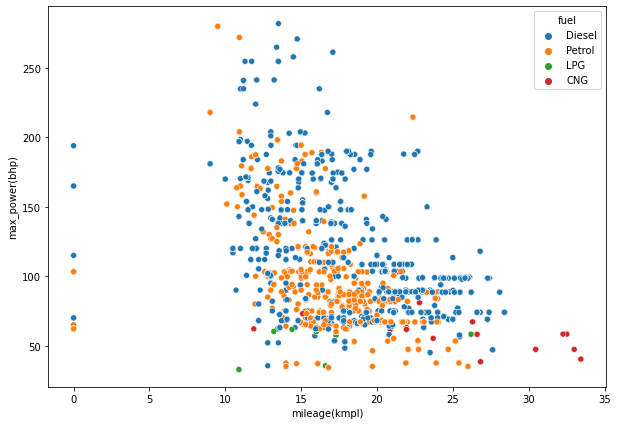

In [14]:
df3 = df2[df2['max_power(bhp)']<300]
sns.scatterplot(data = df3, x = 'mileage(kmpl)', y = 'max_power(bhp)', hue ='fuel', sizes=(50,200))    

#### Box plot denoting the variation in selling price according to the fuel type of the cars.

<AxesSubplot:xlabel='fuel', ylabel='selling_price'>

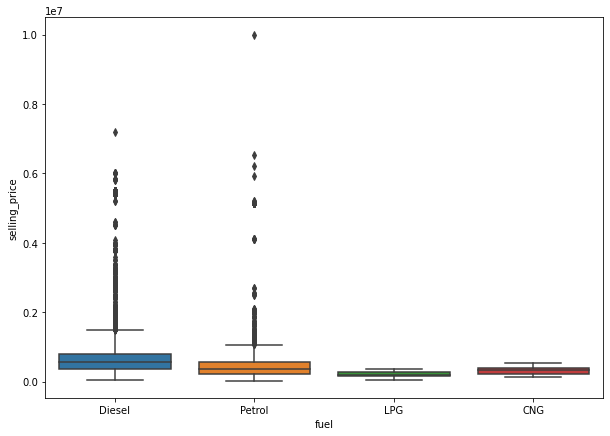

In [15]:
sns.boxplot(data = df2, x = 'fuel', y = 'selling_price')

#### Some data point is difference from most data point so it is outlier.

<AxesSubplot:xlabel='age of car', ylabel='Count'>

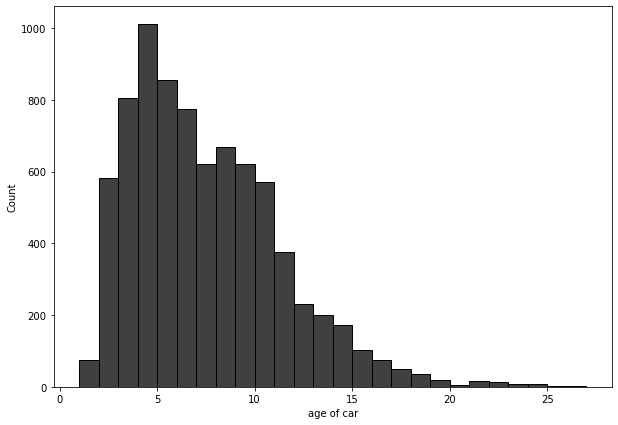

In [16]:
### Age of car distribution at the time selling 
sns.histplot(data = df2, x = 'age of car', color = 'black', binwidth= 1)

<AxesSubplot:xlabel='Count', ylabel='brand'>

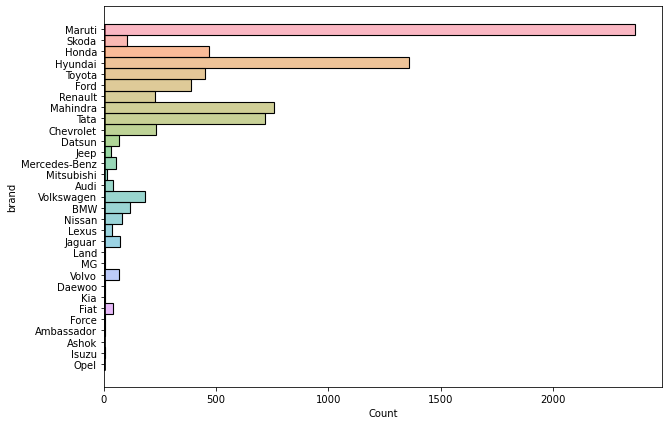

In [17]:
sns.histplot(data = df2, y='brand', hue = 'brand', legend=False, binwidth=0.8)

### Outlier detection using quantile and IQR 

In [18]:
lower_limit, upper_limit = df2['selling_price'].quantile([0.01, 0.9])
upper_limit, lower_limit

(1050000.0, 55719.04999999999)

In [19]:
df4 = df2[(df2['selling_price']>lower_limit) & (df2['selling_price']<upper_limit)]
df4.shape

(7024, 16)

#### Box plot denoting the variation in selling price according to the fuel type of the cars after remove outlier

<AxesSubplot:xlabel='fuel', ylabel='selling_price'>

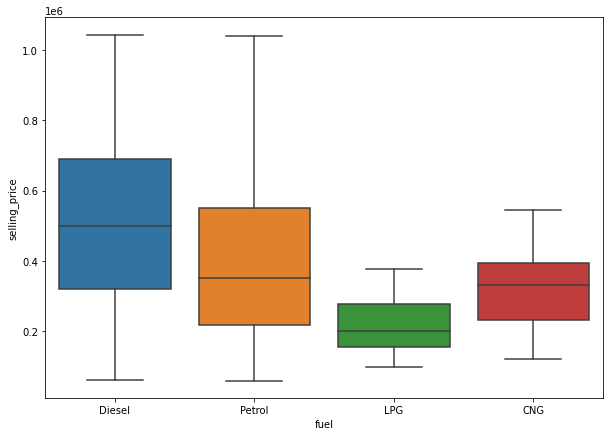

In [20]:
sns.boxplot(data = df4, x = 'fuel', y = 'selling_price')

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

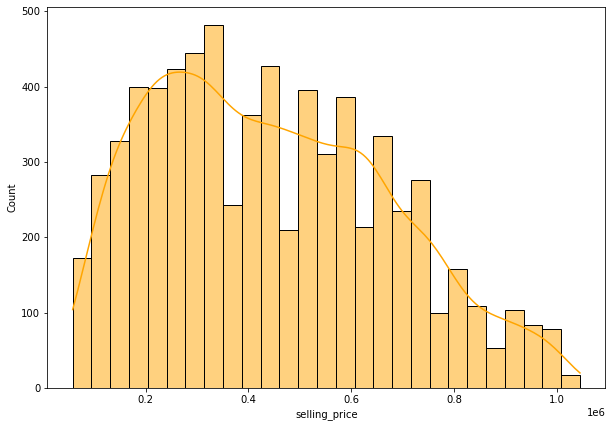

In [22]:
sns.histplot(data = df4, x ='selling_price', kde=True, color ='orange')

In [23]:
###IQR
Q1 = df2['selling_price'].quantile(0.25)
Q3 = df2['selling_price'].quantile(0.75)
IQR = Q3 - Q1
IQR

420000.0

In [24]:
lower_iqr_limit = Q1 - 1.5*IQR
upper_iqr_limit = Q3 + 1.5*IQR
print(lower_iqr_limit, upper_iqr_limit)

-360000.0 1320000.0


In [25]:
df2[(df2['selling_price']>upper_iqr_limit) | (df2['selling_price']<lower_iqr_limit)].shape

(598, 16)

In [26]:
df5 = df2[(df2['selling_price']<upper_iqr_limit) & (df2['selling_price']>lower_iqr_limit)]
df5.shape

(7308, 16)

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

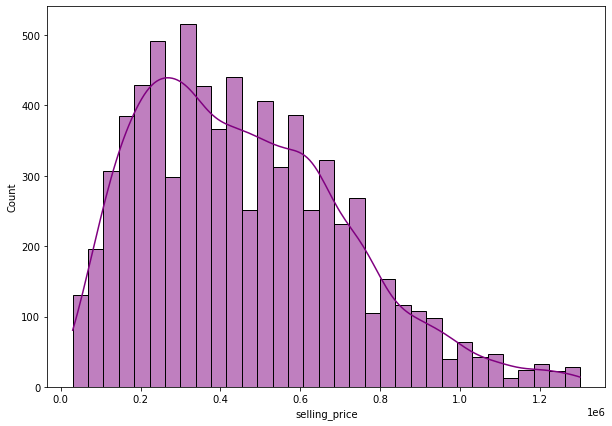

In [23]:
### selling price distribution aftrer remove some outlier
sns.histplot(data = df5, x ='selling_price', kde=True, color ="purple")

### Preparing data for training model

In [27]:
final_dataset = df5.drop(['name', 'torque', 'year', 'current_year', 'brand'], axis =1)
final_dataset.head(5)

,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,mileage(kmpl),engine(CC),max_power(bhp),age of car
0,450000,145500,Diesel,Individual,Manual,First Owner,5.0,23.40,1248.0,74.00,7
1,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,21.14,1498.0,103.52,7
2,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,17.70,1497.0,78.00,15
3,225000,127000,Diesel,Individual,Manual,First Owner,5.0,23.00,1396.0,90.00,11
4,130000,120000,Petrol,Individual,Manual,First Owner,5.0,16.10,1298.0,88.20,14


In [28]:
final_dataset['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [29]:
final_dataset['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [30]:
final_dataset['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner'], dtype=object)

<AxesSubplot:>

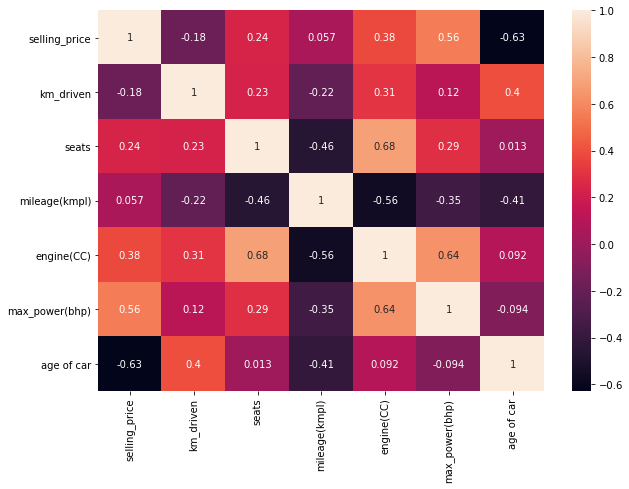

In [31]:
sns.heatmap(final_dataset.corr(), annot= True)

In [32]:
final_dataset = pd.get_dummies(final_dataset, drop_first=True)
final_dataset.head(5)

,selling_price,km_driven,seats,mileage(kmpl),engine(CC),max_power(bhp),age of car,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Third Owner
0,450000,145500,5.0,23.40,1248.0,74.00,7,1,0,0,1,0,1,0,0,0
1,370000,120000,5.0,21.14,1498.0,103.52,7,1,0,0,1,0,1,0,1,0
2,158000,140000,5.0,17.70,1497.0,78.00,15,0,0,1,1,0,1,0,0,1
3,225000,127000,5.0,23.00,1396.0,90.00,11,1,0,0,1,0,1,0,0,0
4,130000,120000,5.0,16.10,1298.0,88.20,14,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,320000,110000,5.0,18.50,1197.0,82.85,8,0,0,1,1,0,1,0,0,0
8124,135000,119000,5.0,16.80,1493.0,110.00,14,1,0,0,1,0,1,1,0,0
8125,382000,120000,5.0,19.30,1248.0,73.90,12,1,0,0,1,0,1,0,0,0
8126,290000,25000,5.0,23.57,1396.0,70.00,8,1,0,0,1,0,1,0,0,0


In [33]:
X = final_dataset.drop('selling_price', axis= 1)
y = final_dataset['selling_price']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3)

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
regressor = RandomForestRegressor()

In [37]:
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [39]:
regressor.score(X_test, y_test)

0.8950067289812068

### GridSearchCV

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [48]:
model_params = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1200, num=12)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(5, 30, num=6)],
    'min_samples_split': [2, 5, 10, 15, 100],
    'min_samples_leaf': [1, 2, 5, 10],
}

In [46]:
randomFR_cv = RandomizedSearchCV(RandomForestRegressor(), model_params, cv= 5,return_train_score=False, n_iter=20)
randomFR_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 181, 263, 345,
                                                         427, 509, 590, 672,
                                                         754, 836, 918, 1000]})

In [47]:
randomFR_cv.best_score_

0.8879173769034228

In [55]:
result_df = pd.DataFrame(randomFR_cv.cv_results_)
result_df.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.037470,0.109247,0.067065,1.185836e-02,263,10,2,sqrt,15,"{'n_estimators': 263, 'min_samples_split': 10,...",0.849379,0.871196,0.873700,0.863117,0.877191,0.866916,0.009919,12
1,0.243922,0.006331,0.016435,9.105829e-04,100,15,5,sqrt,5,"{'n_estimators': 100, 'min_samples_split': 15,...",0.722901,0.745516,0.741100,0.741499,0.744011,0.739005,0.008215,20
2,5.382692,0.364023,0.166385,1.271108e-02,918,100,10,auto,5,"{'n_estimators': 918, 'min_samples_split': 100...",0.791632,0.801352,0.813770,0.797744,0.808974,0.802694,0.007884,18
3,2.259557,0.052964,0.140824,2.009124e-02,672,2,5,sqrt,25,"{'n_estimators': 672, 'min_samples_split': 2, ...",0.832115,0.855758,0.857963,0.848493,0.858486,0.850563,0.009891,14
4,2.026464,0.122901,0.051126,5.250774e-03,181,5,2,auto,25,"{'n_estimators': 181, 'min_samples_split': 5, ...",0.869727,0.890190,0.893328,0.887504,0.894974,0.887145,0.009081,2
5,0.344834,0.046124,0.027613,7.111967e-03,100,10,10,sqrt,30,"{'n_estimators': 100, 'min_samples_split': 10,...",0.804223,0.825758,0.836894,0.817296,0.834501,0.823735,0.011961,15
6,3.119089,0.098058,0.173305,1.907907e-02,1000,15,10,sqrt,30,"{'n_estimators': 1000, 'min_samples_split': 15...",0.803718,0.827888,0.831914,0.820537,0.830390,0.822889,0.010352,16
7,8.037199,0.199616,0.187489,4.101908e-07,1000,10,5,auto,10,"{'n_estimators': 1000, 'min_samples_split': 10...",0.857059,0.876581,0.882638,0.876768,0.882562,0.875122,0.009412,9
8,1.959237,0.028968,0.053122,7.654636e-03,263,15,10,auto,25,"{'n_estimators': 263, 'min_samples_split': 15,...",0.845365,0.867593,0.878055,0.870588,0.870761,0.866472,0.011102,13
9,2.109222,0.017108,0.062500,9.403973e-06,427,100,5,auto,5,"{'n_estimators': 427, 'min_samples_split': 100...",0.791855,0.802650,0.812568,0.798003,0.807939,0.802603,0.007273,19


In [52]:
result_df = result_df[['params','mean_test_score']]

In [53]:
result_df

,params,mean_test_score
0,"{'n_estimators': 263, 'min_samples_split': 10,...",0.866916
1,"{'n_estimators': 100, 'min_samples_split': 15,...",0.739005
2,"{'n_estimators': 918, 'min_samples_split': 100...",0.802694
3,"{'n_estimators': 672, 'min_samples_split': 2, ...",0.850563
4,"{'n_estimators': 181, 'min_samples_split': 5, ...",0.887145
5,"{'n_estimators': 100, 'min_samples_split': 10,...",0.823735
6,"{'n_estimators': 1000, 'min_samples_split': 15...",0.822889
7,"{'n_estimators': 1000, 'min_samples_split': 10...",0.875122
8,"{'n_estimators': 263, 'min_samples_split': 15,...",0.866472
9,"{'n_estimators': 427, 'min_samples_split': 100...",0.802603


#### LinearRegression

In [57]:
linReg = LinearRegression()
linReg.fit(X_train, y_train)

#Make prediction
y_pred = linReg.predict(X_test)
y_pred

array([752162.42561772, 560289.40373273, 268937.84557328, ...,
       397284.15936392, 182048.11033882, 303014.6087947 ])

In [62]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

predictions = cross_val_predict(linReg, X_test, y_test, cv = 5)
accuracy = metrics.r2_score(y_test,y_pred) 
print('accuracy of model by r2_score: {}'.format(accuracy))

accuracy of model by r2_score: 0.692367462472963


#### Save model with pickle

In [63]:
import pickle
with open('Car_price_model.pickle', 'wb') as f:
    pickle.dump(regressor, f)